### importing libraries


In [1]:
import numpy as np
import pandas as pd
from scipy.stats import boxcox
import matplotlib.pyplot as plt
from scipy.special import boxcox, inv_boxcox
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from datetime import date
from nsepy import get_history

In [3]:
# def get_data(name):
#     data = get_history(symbol = name , start=date(2017,1,1), end= date(2021,10,18))
#     return data

In [4]:
# data = get_data(input('Enter Company Name  : '))

### Using nsepy librery to scrape the data from site

In [5]:
data = get_history(symbol = 'RELIANCE', start=date(2015,1,1), end = date(2022,10,29)) 

In [6]:
data.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2021-10-26,RELIANCE,EQ,2601.80,2617.10,2668.90,2603.15,2666.3,2661.05,2635.70,4499706,1.185986e+15,199021,2113316,0.4697
2021-10-27,RELIANCE,EQ,2661.05,2652.00,2676.80,2619.95,2622.3,2627.40,2652.28,4567140,1.211333e+15,176020,2090011,0.4576
2021-10-28,RELIANCE,EQ,2627.40,2620.00,2637.95,2590.50,2598.0,2598.60,2610.69,4562471,1.191119e+15,170822,2460989,0.5394
2021-10-29,RELIANCE,EQ,2598.60,2596.15,2596.15,2501.70,2540.0,2536.25,2548.04,6568539,1.673689e+15,277855,3111491,0.4737
2021-11-01,RELIANCE,EQ,2536.25,2536.25,2556.00,2494.10,2538.1,2537.80,2523.59,7144532,1.802989e+15,273829,4144630,0.5801


### Writing to CSV file

In [7]:
data.to_csv('data.csv')
data1 = pd.read_csv("data.csv")

In [8]:
data1.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1.692000e+03,1.692000e+03,1.692000e+03,1692.000000
mean,1320.987766,1323.145095,1338.183747,1307.259781,1321.979994,1321.960963,1322.969362,7.966448e+06,1.166262e+15,1.814726e+05,3.320324e+06,0.470318
std,449.461542,451.507078,456.368452,445.322029,450.412387,450.312185,450.818048,7.052513e+06,1.308632e+15,1.478916e+05,2.313803e+06,0.127046
min,780.900000,791.750000,793.400000,779.100000,781.200000,780.900000,785.510000,2.995110e+05,2.781933e+13,8.723000e+03,9.803000e+04,0.114800
25%,972.212500,972.262500,982.375000,962.687500,973.187500,972.637500,973.527500,3.586045e+06,3.683792e+14,8.483525e+04,1.868678e+06,0.381400
50%,1154.350000,1154.500000,1179.625000,1139.650000,1158.075000,1155.800000,1160.005000,5.982310e+06,7.468584e+14,1.388905e+05,2.695104e+06,0.477550
75%,1534.250000,1540.412500,1550.000000,1523.175000,1535.925000,1535.400000,1535.515000,9.704896e+06,1.450907e+15,2.214178e+05,4.033852e+06,0.561100
max,2731.850000,2742.750000,2751.350000,2708.000000,2730.800000,2731.850000,2733.670000,6.523089e+07,1.473434e+16,1.428490e+06,1.919505e+07,0.827000


In [9]:
data1.shape

(1692, 15)

In [10]:
data1.dtypes

Date                   object
Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                  int64
Deliverable Volume      int64
%Deliverble           float64
dtype: object

In [11]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                1692 non-null   object 
 1   Symbol              1692 non-null   object 
 2   Series              1692 non-null   object 
 3   Prev Close          1692 non-null   float64
 4   Open                1692 non-null   float64
 5   High                1692 non-null   float64
 6   Low                 1692 non-null   float64
 7   Last                1692 non-null   float64
 8   Close               1692 non-null   float64
 9   VWAP                1692 non-null   float64
 10  Volume              1692 non-null   int64  
 11  Turnover            1692 non-null   float64
 12  Trades              1692 non-null   int64  
 13  Deliverable Volume  1692 non-null   int64  
 14  %Deliverble         1692 non-null   float64
dtypes: float64(9), int64(3), object(3)
memory usage: 198.4+

### checking the trend

Text(0, 0.5, 'Closing Price')

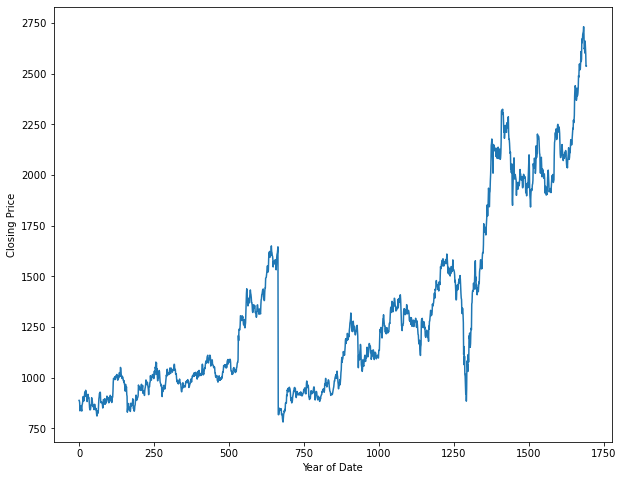

In [12]:
figure = plt.figure(figsize = (10,8))
plt.plot(data1.Close)
plt.xlabel("Year of Date")
plt.ylabel("Closing Price")

(array([434., 420., 273., 165.,  65.,  58., 166.,  71.,  20.,  20.]),
 array([ 780.9  ,  975.995, 1171.09 , 1366.185, 1561.28 , 1756.375,
        1951.47 , 2146.565, 2341.66 , 2536.755, 2731.85 ]),
 <BarContainer object of 10 artists>)

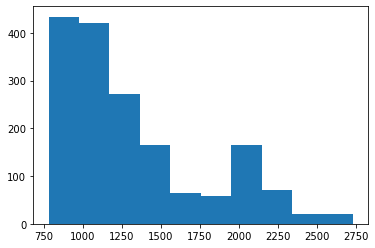

In [13]:
plt.hist(data1.Close)

### As the data is skewed lets apply some transformations

In [14]:
data1['Close'].skew()

1.054778646448907

### Log transformation

In [15]:
close_log = np.log(data1['Close'])

In [16]:
close_log.skew()

0.6659640324682535

The skewness reduced little

(array([120., 407., 307., 180., 205., 129.,  20., 200.,  91.,  33.]),
 array([6.6604471 , 6.78567582, 6.91090454, 7.03613326, 7.16136199,
        7.28659071, 7.41181943, 7.53704815, 7.66227687, 7.78750559,
        7.91273431]),
 <BarContainer object of 10 artists>)

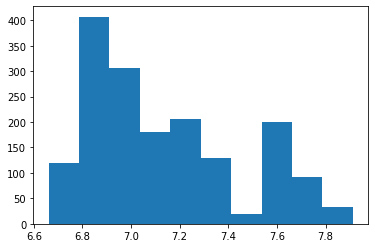

In [17]:
# plot_log
plt.hist(close_log)

### sqrt transformation

In [18]:
close_sqrt = np.sqrt(data1['Close'])
close_sqrt.skew()

0.8579006792511565

Here after applying sqrt skewness increased than log transformation

### box cox transformation

In [19]:
from scipy import stats
close_box,lambda_ = stats.boxcox(data1['Close'])

In [20]:
pd.Series(close_box).skew()

0.178271864406059

### This box cox is giving good result so we will go with box cox transformation

(array([ 20., 119., 249., 289., 164., 170., 211., 128., 171., 171.]),
 array([0.74395692, 0.74396477, 0.74397261, 0.74398046, 0.74398831,
        0.74399616, 0.744004  , 0.74401185, 0.7440197 , 0.74402754,
        0.74403539]),
 <BarContainer object of 10 artists>)

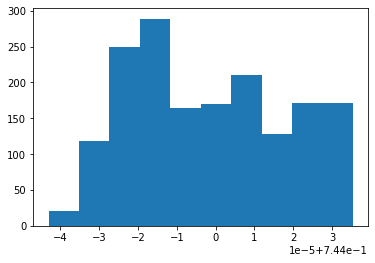

In [21]:
# plot box cox
plt.hist(close_box)

In [22]:
data1['Close'] = close_box # Replacing the Close data with boxcox transformed one 

In [23]:
data1.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,RELIANCE,EQ,891.15,886.3,892.00,883.65,888.00,0.743972,887.62,677439,6.013059e+13,16263,286377,0.4227
1,2015-01-02,RELIANCE,EQ,887.90,888.1,896.05,884.30,884.95,0.743972,889.39,1675827,1.490461e+14,31269,1048543,0.6257
2,2015-01-05,RELIANCE,EQ,885.55,885.0,890.90,874.10,875.55,0.743971,881.88,2309591,2.036781e+14,67035,1393132,0.6032
3,2015-01-06,RELIANCE,EQ,875.85,870.0,873.00,832.00,832.50,0.743965,847.60,4258043,3.609133e+14,120767,2353273,0.5527
4,2015-01-07,RELIANCE,EQ,836.10,837.1,858.80,837.00,858.00,0.743968,849.81,4736315,4.024972e+14,125939,2885468,0.6092


### Converting Date column into year , month and day

In [24]:
data1["Date"] = pd.to_datetime(data1.Date,format="%Y-%m-%d")

data1["month"] = data1.Date.dt.strftime("%m") # month extraction
data1["year"] = data1.Date.dt.strftime("%Y") # year extraction
data1["day"] = data1.Date.dt.strftime("%d") # day extraction


In [25]:
data1

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,month,year,day
0,2015-01-01,RELIANCE,EQ,891.15,886.30,892.00,883.65,888.00,0.743972,887.62,677439,6.013059e+13,16263,286377,0.4227,01,2015,01
1,2015-01-02,RELIANCE,EQ,887.90,888.10,896.05,884.30,884.95,0.743972,889.39,1675827,1.490461e+14,31269,1048543,0.6257,01,2015,02
2,2015-01-05,RELIANCE,EQ,885.55,885.00,890.90,874.10,875.55,0.743971,881.88,2309591,2.036781e+14,67035,1393132,0.6032,01,2015,05
3,2015-01-06,RELIANCE,EQ,875.85,870.00,873.00,832.00,832.50,0.743965,847.60,4258043,3.609133e+14,120767,2353273,0.5527,01,2015,06
4,2015-01-07,RELIANCE,EQ,836.10,837.10,858.80,837.00,858.00,0.743968,849.81,4736315,4.024972e+14,125939,2885468,0.6092,01,2015,07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687,2021-10-26,RELIANCE,EQ,2601.80,2617.10,2668.90,2603.15,2666.30,0.744035,2635.70,4499706,1.185986e+15,199021,2113316,0.4697,10,2021,26
1688,2021-10-27,RELIANCE,EQ,2661.05,2652.00,2676.80,2619.95,2622.30,0.744034,2652.28,4567140,1.211333e+15,176020,2090011,0.4576,10,2021,27
1689,2021-10-28,RELIANCE,EQ,2627.40,2620.00,2637.95,2590.50,2598.00,0.744034,2610.69,4562471,1.191119e+15,170822,2460989,0.5394,10,2021,28
1690,2021-10-29,RELIANCE,EQ,2598.60,2596.15,2596.15,2501.70,2540.00,0.744034,2548.04,6568539,1.673689e+15,277855,3111491,0.4737,10,2021,29


In [26]:
new_data = data1[['Date','Close']]

In [27]:
new_data

,Date,Close
0,2015-01-01,0.743972
1,2015-01-02,0.743972
2,2015-01-05,0.743971
3,2015-01-06,0.743965
4,2015-01-07,0.743968
...,...,...
1687,2021-10-26,0.744035
1688,2021-10-27,0.744034
1689,2021-10-28,0.744034
1690,2021-10-29,0.744034


In [28]:
new_data = data1[['Date','Close','year','month','day']]

In [29]:
new_data

,Date,Close,year,month,day
0,2015-01-01,0.743972,2015,01,01
1,2015-01-02,0.743972,2015,01,02
2,2015-01-05,0.743971,2015,01,05
3,2015-01-06,0.743965,2015,01,06
4,2015-01-07,0.743968,2015,01,07
...,...,...,...,...,...
1687,2021-10-26,0.744035,2021,10,26
1688,2021-10-27,0.744034,2021,10,27
1689,2021-10-28,0.744034,2021,10,28
1690,2021-10-29,0.744034,2021,10,29


In [30]:
new_data = new_data.set_index(['Date'])

### # converting the column to specific datatypes

In [31]:
new_data['Close'] = pd.to_numeric(new_data['Close'])
new_data['month'] = pd.to_numeric(new_data['month'])
new_data['day']   = pd.to_numeric(new_data['day'])
new_data['year']  = pd.to_numeric(new_data['year'])

### Boxplot for year wise, month wise and day wise data 

<AxesSubplot:xlabel='day', ylabel='Close'>

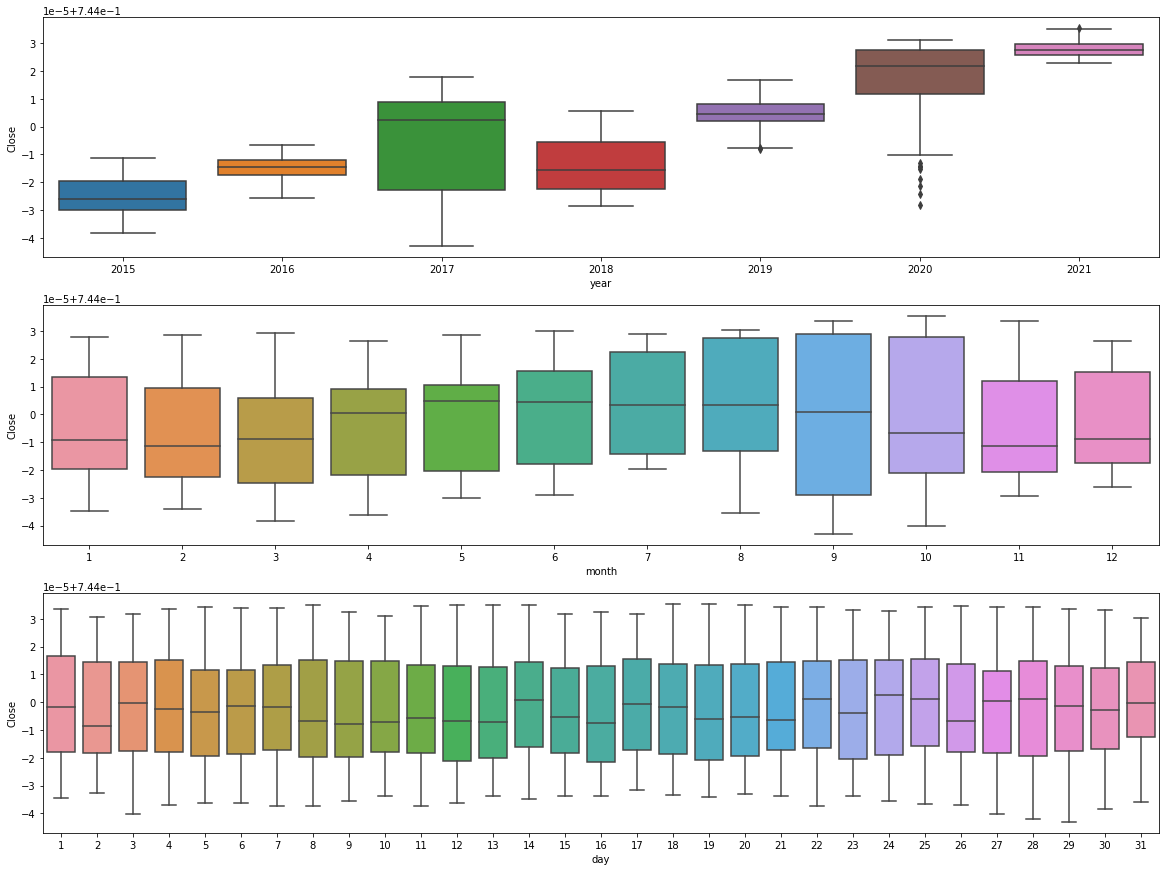

In [32]:
plt.figure(figsize=(20,15))
plt.subplot(311)
sns.boxplot(x="year",y="Close",data=new_data)
plt.subplot(312)
sns.boxplot(x="month",y="Close",data=new_data)
plt.subplot(313)
sns.boxplot(x = 'day', y = 'Close', data = new_data)

# LSTM model

In [33]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#### Dropping non relevent columns

In [34]:
data =data.drop(columns = {'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
        'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'})

In [35]:
data

,Close
Date,
2015-01-01,887.90
2015-01-02,885.55
2015-01-05,875.85
2015-01-06,836.10
2015-01-07,854.30
...,...
2021-10-26,2661.05
2021-10-27,2627.40
2021-10-28,2598.60


### Applying Boxcox transformation 

In [36]:
from scipy import stats
close_box,lambda_ = stats.boxcox(data['Close'])
data['Close'] = close_box

In [37]:
new_data = data.copy()

In [38]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))   # values will be scaled between 0 and 1
data = scaler.fit_transform(data)

In [39]:
training_size=int(len(data)*0.80)
test_size=len(data)-training_size
train = data[0:training_size,:]
valid = data[training_size:len(data),:1]

In [40]:
train.shape, valid.shape

((1353, 1), (339, 1))

In [41]:
x_train, y_train = [], []
for i in range(100,len(train)):
    x_train.append(data[i-100:i,0])
    y_train.append(data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [42]:
# create and fit the LSTM network
# model = Sequential()
# model.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1],1)))
# model.add(LSTM(100,return_sequences=True))
# model.add(LSTM(100,return_sequences=True))
# model.add(LSTM(units=100))
# model.add(Dense(1))

# model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(x_train, y_train, epochs=30, batch_size=18, verbose=10)

In [43]:
# model.save('model')  ## Saving the model

In [44]:
from tensorflow import keras
model = keras.models.load_model('model') # Loading the model

In [45]:
#predicting 100 values, using past 30 from the train data
inputs = data[len(data) - len(valid) - 100:]
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [46]:
X_test = []
for i in range(100,inputs.shape[0]):
    X_test.append(inputs[i-100:i,0])
X_test = np.array(X_test)


### Predicting for Test data

In [47]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [48]:
rmse_test = np.sqrt(np.mean(np.power((valid-closing_price),2)))
inv_boxcox(rmse_test, lambda_ ) 

1.2006059908101472

### Predicting for Train data

In [49]:
predictions_train = model.predict(x_train)
# predictions_train = scaler.inverse_transform(predictions_train)

In [50]:
predictions_train

array([[0.1861458 ],
       [0.18152447],
       [0.19446628],
       ...,
       [0.84017146],
       [0.8154328 ],
       [0.8099011 ]], dtype=float32)

In [51]:
# Get the root mean squared error (RMSE)
rmse_train = np.sqrt(np.mean(np.power((y_train-predictions_train),2)))
inv_boxcox(rmse_train, lambda_) #Train RMSE

1.3724112348767001

In [52]:
predictions_train

array([[0.1861458 ],
       [0.18152447],
       [0.19446628],
       ...,
       [0.84017146],
       [0.8154328 ],
       [0.8099011 ]], dtype=float32)

In [53]:
inv_boxcox(rmse_test, lambda_) - inv_boxcox(rmse_train, lambda_)  # RMSE test - train

-0.17180524406655295

### Demonstrate prediction for next 30 days

In [54]:
x_input=valid[len(valid)-100:].reshape(1,-1)
x_input.shape

(1, 100)

In [55]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [56]:
len(temp_input)

100

In [57]:
np.array(temp_input[1:])

array([0.91971973, 0.92535463, 0.93109727, 0.93200202, 0.92506933,
       0.92581381, 0.92763844, 0.92973107, 0.92765658, 0.92391416,
       0.91402691, 0.90414587, 0.90028787, 0.90066778, 0.9054246 ,
       0.90279576, 0.90916819, 0.91337868, 0.90831025, 0.90530123,
       0.90167713, 0.8971348 , 0.89988602, 0.90316021, 0.90028787,
       0.89951513, 0.90578394, 0.9030041 , 0.90192862, 0.90747877,
       0.90440439, 0.89834472, 0.89362237, 0.88972093, 0.89323905,
       0.88926264, 0.89741387, 0.90065724, 0.90400094, 0.91021247,
       0.90093115, 0.89840875, 0.90072048, 0.90678638, 0.90539376,
       0.91248109, 0.91790621, 0.91612248, 0.91774305, 0.91299455,
       0.91575387, 0.91985263, 0.92340344, 0.92850745, 0.92795577,
       0.93554746, 0.93343791, 0.93500082, 0.93967999, 0.95485282,
       0.96045719, 0.96271037, 0.96130787, 0.96045719, 0.95222382,
       0.95173823, 0.95327603, 0.96084243, 0.95516782, 0.95575005,
       0.95732494, 0.96118242, 0.96970861, 0.96870057, 0.97445

In [58]:
n_days = int(input( 'Enter the number of days for prediction : '))

Enter the number of days for prediction : 10


In [59]:

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<n_days):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9884573]
101
1 day input [0.91971973 0.92535463 0.93109727 0.93200202 0.92506933 0.92581381
 0.92763844 0.92973107 0.92765658 0.92391416 0.91402691 0.90414587
 0.90028787 0.90066778 0.9054246  0.90279576 0.90916819 0.91337868
 0.90831025 0.90530123 0.90167713 0.8971348  0.89988602 0.90316021
 0.90028787 0.89951513 0.90578394 0.9030041  0.90192862 0.90747877
 0.90440439 0.89834472 0.89362237 0.88972093 0.89323905 0.88926264
 0.89741387 0.90065724 0.90400094 0.91021247 0.90093115 0.89840875
 0.90072048 0.90678638 0.90539376 0.91248109 0.91790621 0.91612248
 0.91774305 0.91299455 0.91575387 0.91985263 0.92340344 0.92850745
 0.92795577 0.93554746 0.93343791 0.93500082 0.93967999 0.95485282
 0.96045719 0.96271037 0.96130787 0.96045719 0.95222382 0.95173823
 0.95327603 0.96084243 0.95516782 0.95575005 0.95732494 0.96118242
 0.96970861 0.96870057 0.97445219 0.97760588 0.97491079 0.973748
 0.97435084 0.97867257 0.98546734 0.9791572  0.98078882 0.99301504
 0.99079596 0.99260617 0.99579063 0.

In [60]:
# day_new=np.arange(1,101)
# day_pred=np.arange(101,131)

day_new= new_data.index[len(new_data)-100:]
day_pred= pd.date_range(date.today(), periods= n_days , freq='D')

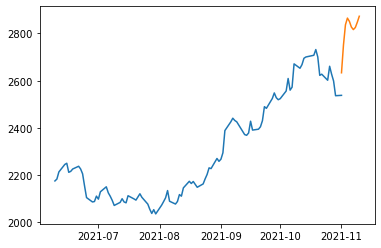

In [61]:
# plt.plot(day_new,scaler.inverse_transform(data[len(data)-100 :]))
# plt.plot(day_pred,scaler.inverse_transform((lst_output)))
plt.plot(day_new,inv_boxcox(scaler.inverse_transform(data[len(data)-100 :]), lambda_ ), label = ' actual Closing price')
plt.plot(day_pred,inv_boxcox(scaler.inverse_transform((lst_output)), lambda_ ), label = 'Predicted')
# plt.grid(True)

In [62]:
output = inv_boxcox(scaler.inverse_transform((lst_output)), lambda_ )
output

array([[2633.3731899 ],
       [2751.08166699],
       [2836.77223612],
       [2865.17535984],
       [2851.29344762],
       [2827.26284237],
       [2816.43222777],
       [2825.23113135],
       [2847.61903151],
       [2873.02582222]])

### Forecasted  Values 

In [63]:
output = inv_boxcox(scaler.inverse_transform((lst_output)), lambda_ )
output

array([[2633.3731899 ],
       [2751.08166699],
       [2836.77223612],
       [2865.17535984],
       [2851.29344762],
       [2827.26284237],
       [2816.43222777],
       [2825.23113135],
       [2847.61903151],
       [2873.02582222]])

### Confidence interval

In [64]:
conf_interval = stats.norm.interval(0.95,
loc = output.mean(),
scale = output.std())
print( 'Gain at 95% confidence interval is:', np.round(conf_interval, 2))

Gain at 95% confidence interval is: [2679.77 2945.69]


In [65]:
low , high = conf_interval

In [66]:
low , high

(2679.767896661865, 2945.685494476259)

In [67]:
output

array([[2633.3731899 ],
       [2751.08166699],
       [2836.77223612],
       [2865.17535984],
       [2851.29344762],
       [2827.26284237],
       [2816.43222777],
       [2825.23113135],
       [2847.61903151],
       [2873.02582222]])

## ERROR calculation

In [68]:
output = pd.DataFrame( output , columns = {'Predicted':0})
output = pd.DataFrame( output , columns = {'Predicted':0 , 'Actual_price': "actual_price"})
# output.to_csv('Forecasted.csv')

In [75]:
# output.to_csv('output')

In [70]:
output.set_index(day_pred , inplace= True)

In [76]:
output

,Predicted,Actual_price
2021-11-01,2633.373190,2537.8
2021-11-02,2751.081667,NaN
2021-11-03,2836.772236,NaN
2021-11-04,2865.175360,NaN
2021-11-05,2851.293448,NaN
2021-11-06,2827.262842,NaN
2021-11-07,2816.432228,NaN
2021-11-08,2825.231131,NaN
2021-11-09,2847.619032,NaN
2021-11-10,2873.025822,NaN


In [71]:
# output['Actual_price'][0] = inv_boxcox(new_data.Close.tail(1), lambda_ )

In [72]:
for i in range(0 , n_days):
    if output.index[i] == new_data.index[-1]:
#         output['Actual_price'][i] = np.round(inv_boxcox(new_data['Close'][-1], lambda_ ),2)
        with open('file.csv', 'a') as f:
            f.write(str(np.round(inv_boxcox(new_data['Close'][-1], lambda_ ),2)))
    else :
        pass  

In [ ]:
output

In [ ]:
# output['Error'] = output.Predicted - output.Actual_price

In [ ]:
# output